In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
import pandas_datareader as pdweb
from datetime import datetime

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = pdweb.DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,244.817976,239.372342,241.775277,242.328214,3.322483e+07,241.266598
std,43.297997,42.040201,42.544341,42.910394,1.738073e+07,43.455200
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,206.437500,203.307507,204.287495,204.522499,2.167430e+07,202.607368
50%,237.644997,233.904999,234.994995,235.595001,2.766560e+07,234.333656
75%,278.787506,268.717499,270.964989,273.927490,3.786918e+07,273.764626
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-04-22 to 2020-04-20
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


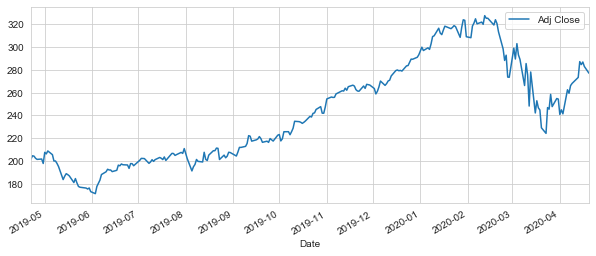

In [9]:
AAPL['Adj Close'].plot(legend = True, figsize =(10,4))

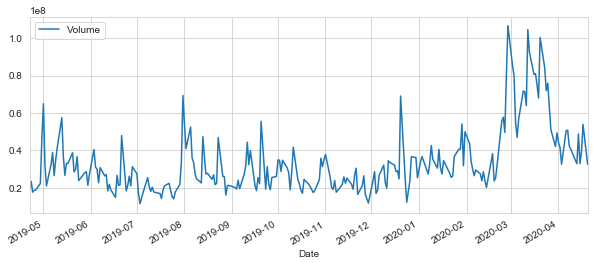

In [10]:
AAPL['Volume'].plot(legend = True, figsize =(10,4))

In [11]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] =AAPL['Adj Close'].rolling(ma).mean()

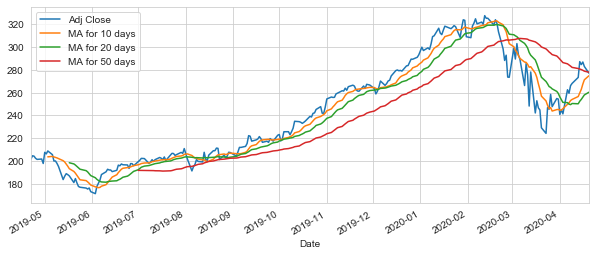

In [12]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False, figsize = (10,4))

In [13]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

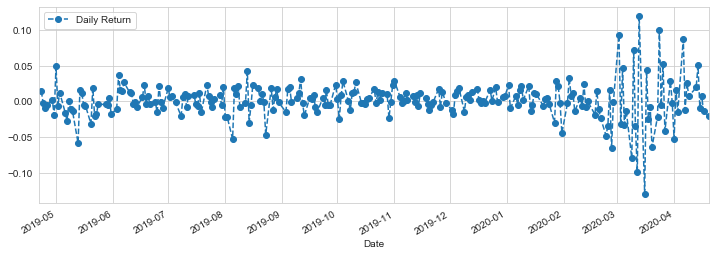

In [14]:
AAPL['Daily Return'].plot(figsize = (12,4), legend = True , linestyle = '--', marker = 'o')

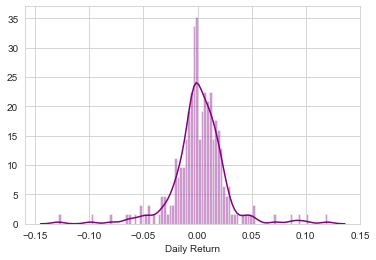

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100, color = 'purple')

In [16]:
closing_df = pdweb.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

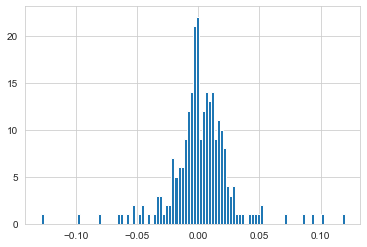

In [17]:
AAPL['Daily Return'].hist(bins = 100)

In [18]:
tech_rets = closing_df.pct_change()

In [19]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-22,NaN,NaN,NaN,NaN
2019-04-23,0.014423,0.012580,0.013575,0.019318
2019-04-24,-0.001542,-0.006761,-0.003428,-0.011446
2019-04-25,-0.009075,0.005931,0.033117,0.000263
2019-04-26,-0.004774,0.006910,0.005730,0.025433
...,...,...,...,...
2020-04-14,0.050503,0.042437,0.049483,0.052769
2020-04-15,-0.009127,-0.005326,-0.010478,0.010669
2020-04-16,0.007946,0.000792,0.030021,0.043555


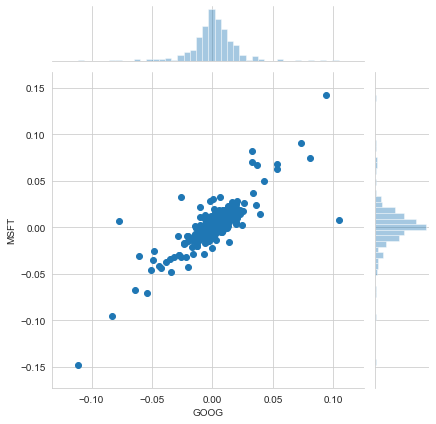

In [20]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter')

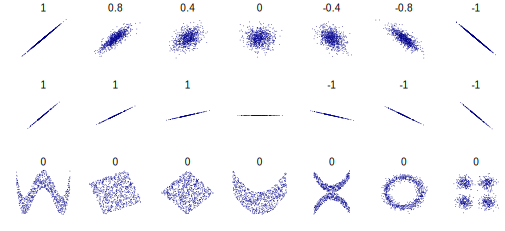

In [21]:
from IPython.display import SVG
SVG(url = 'http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

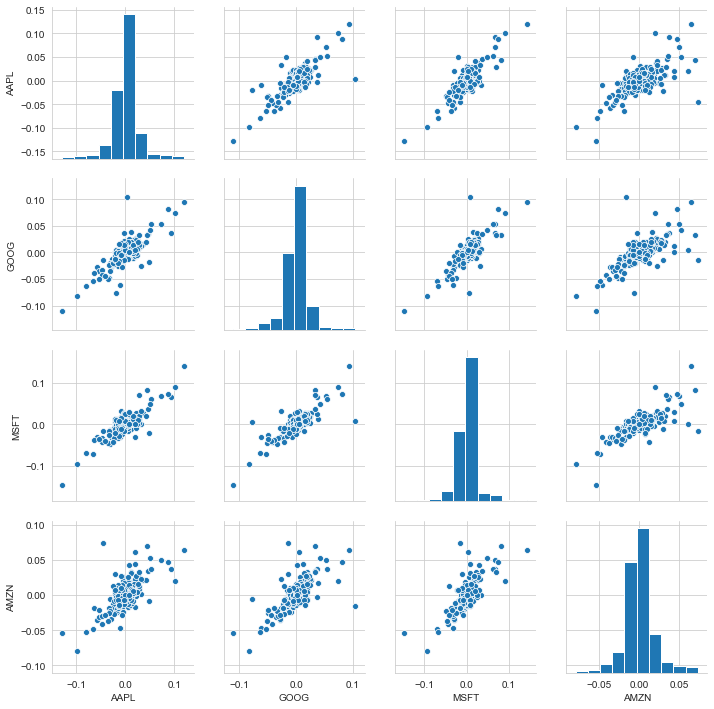

In [22]:
sns.pairplot(tech_rets.dropna())

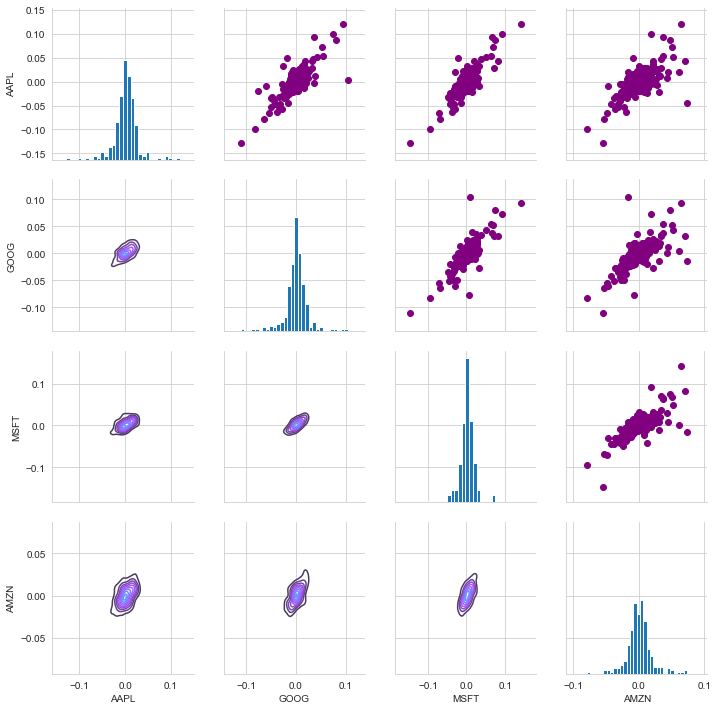

In [23]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist,bins = 30)

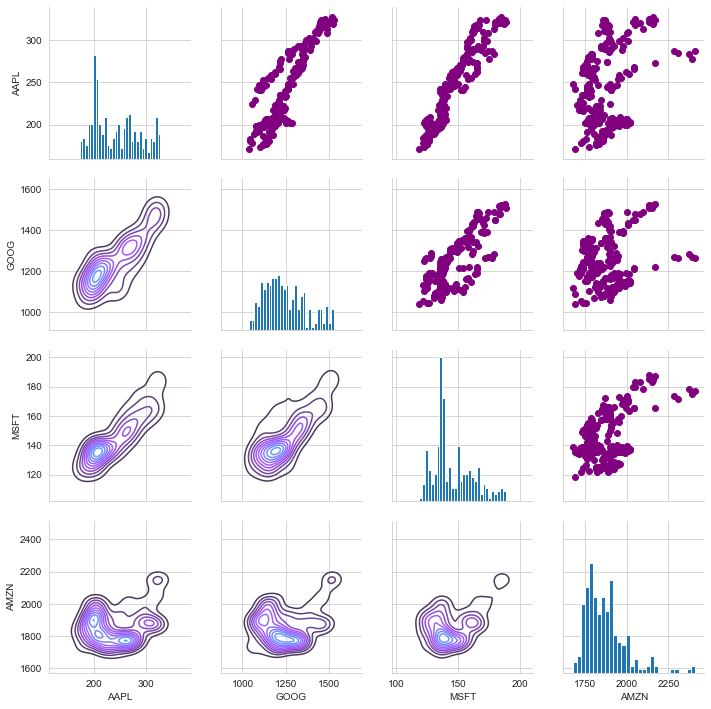

In [24]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist,bins = 30)

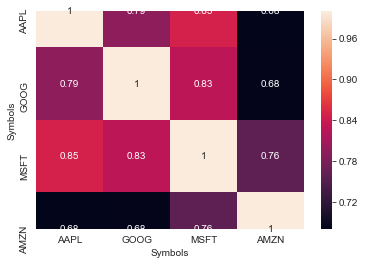

In [25]:
sns.heatmap(tech_rets.corr(),annot = True)  #Correlation plot

In [26]:
rets = tech_rets.dropna()

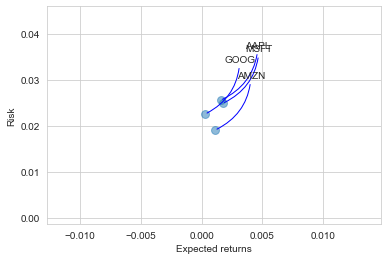

In [27]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha = 0.5, s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-',color = 'blue', connectionstyle = 'arc3,rad=-0.3'))

In [28]:
rets['AAPL'].quantile(.05)

-0.03430134464461804

In [33]:
for i in tech_list:
    print(rets[i].quantile(.05))

-0.03430134464461804
-0.034626368578302535
-0.03173749271277171
-0.02725076430758372


In [34]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-22,1249.089966,1228.310059,1235.989990,1248.839966,807300,1248.839966
2019-04-23,1269.000000,1246.380005,1250.689941,1264.550049,1319900,1264.550049
2019-04-24,1268.010010,1255.000000,1264.119995,1256.000000,1018800,1256.000000
2019-04-25,1267.407959,1252.030029,1264.770020,1263.449951,1107300,1263.449951
2019-04-26,1273.069946,1260.319946,1269.000000,1272.180054,1241400,1272.180054
...,...,...,...,...,...,...
2020-04-14,1282.069946,1236.930054,1245.089966,1269.229980,2470400,1269.229980
2020-04-15,1280.459961,1240.400024,1245.609985,1262.469971,1671700,1262.469971
2020-04-16,1279.000000,1242.619995,1274.099976,1263.469971,2518100,1263.469971


In [35]:
days = 365

dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [36]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        
        price[x] = price[x-1]+ (price[x-1]*(drift[x]+shock[x]))
        
    return price




Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

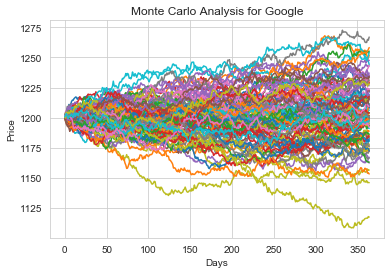

In [37]:
start_price = 1200.680054
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [38]:
runs = 10000

simulations = np.zeros(runs)
np.set_printoptions(threshold = 5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

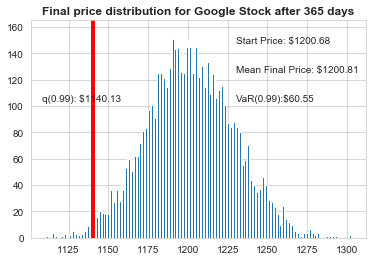

In [39]:
q = np.percentile(simulations,1)
plt.hist(simulations, bins = 200)

plt.figtext(0.6,0.8,  s= "Start Price: $%.2f" %start_price)

plt.figtext(0.6,0.7, 'Mean Final Price: $%.2f'%simulations.mean())

plt.figtext(0.6,0.6, 'VaR(0.99):$%.2f' %(start_price - q,))

plt.figtext(0.15,0.6, 'q(0.99): $%.2f'%q)

plt.axvline(x=q, linewidth = 4, color = 'r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');


Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

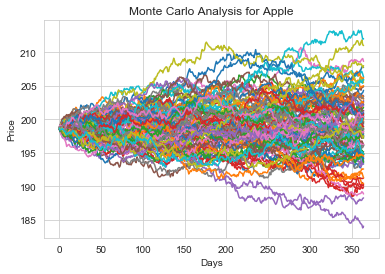

In [40]:
days = 365

dt = 1/days
mu = rets.mean()['AAPL']
sigma = rets.std()['AAPL']


def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        
        price[x] = price[x-1]+ (price[x-1]*(drift[x]+shock[x]))
        
    return price


start_price = 198.679993
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

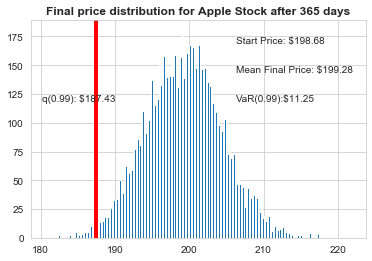

In [41]:
runs = 10000

simulations = np.zeros(runs)
np.set_printoptions(threshold = 5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


q = np.percentile(simulations,1)
plt.hist(simulations, bins = 200)

plt.figtext(0.6,0.8,  s= "Start Price: $%.2f" %start_price)

plt.figtext(0.6,0.7, 'Mean Final Price: $%.2f'%simulations.mean())

plt.figtext(0.6,0.6, 'VaR(0.99):$%.2f' %(start_price - q,))

plt.figtext(0.15,0.6, 'q(0.99): $%.2f'%q)

plt.axvline(x=q, linewidth = 4, color = 'r')

plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');

Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

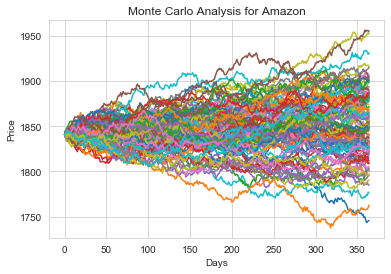

In [42]:
days = 365

dt = 1/days
mu = rets.mean()['AMZN']
sigma = rets.std()['AMZN']


def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        
        price[x] = price[x-1]+ (price[x-1]*(drift[x]+shock[x]))
        
    return price


start_price = 1841.000000
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

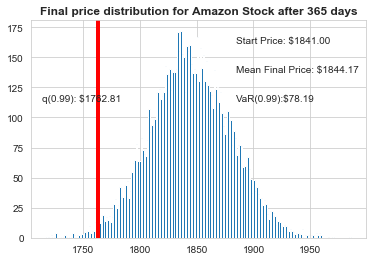

In [43]:
runs = 10000

simulations = np.zeros(runs)
np.set_printoptions(threshold = 5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


q = np.percentile(simulations,1)
plt.hist(simulations, bins = 200)

plt.figtext(0.6,0.8,  s= "Start Price: $%.2f" %start_price)

plt.figtext(0.6,0.7, 'Mean Final Price: $%.2f'%simulations.mean())

plt.figtext(0.6,0.6, 'VaR(0.99):$%.2f' %(start_price - q,))

plt.figtext(0.15,0.6, 'q(0.99): $%.2f'%q)

plt.axvline(x=q, linewidth = 4, color = 'r')

plt.title(u"Final price distribution for Amazon Stock after %s days" % days, weight='bold');

Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

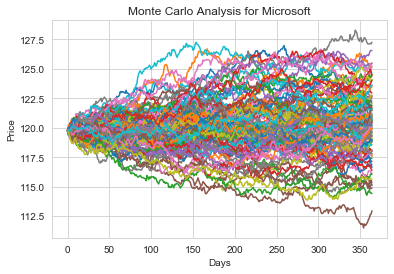

In [44]:
days = 365

dt = 1/days
mu = rets.mean()['MSFT']
sigma = rets.std()['MSFT']


def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        
        price[x] = price[x-1]+ (price[x-1]*(drift[x]+shock[x]))
        
    return price


start_price = 119.760002
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')


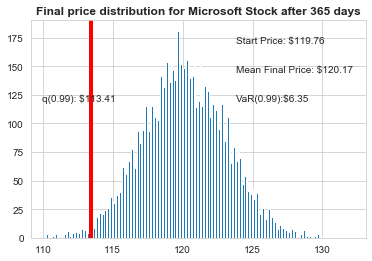

In [45]:
runs = 10000

simulations = np.zeros(runs)
np.set_printoptions(threshold = 5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


q = np.percentile(simulations,1)
plt.hist(simulations, bins = 200)

plt.figtext(0.6,0.8,  s= "Start Price: $%.2f" %start_price)

plt.figtext(0.6,0.7, 'Mean Final Price: $%.2f'%simulations.mean())

plt.figtext(0.6,0.6, 'VaR(0.99):$%.2f' %(start_price - q,))

plt.figtext(0.15,0.6, 'q(0.99): $%.2f'%q)

plt.axvline(x=q, linewidth = 4, color = 'r')

plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold');

In [41]:
MSFT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-16,121.650002,120.099998,121.639999,120.769997,14071800.0,119.193001
2019-04-17,121.849998,120.540001,121.239998,121.769997,19300900.0,120.179947
2019-04-18,123.519997,121.300003,122.190002,123.370003,27991000.0,121.759056
2019-04-22,124.000000,122.570000,122.620003,123.760002,15648700.0,122.143959
2019-04-23,125.580002,123.830002,124.099998,125.440002,24025500.0,123.802032
...,...,...,...,...,...,...
2020-04-09,167.369995,163.330002,166.360001,165.139999,51431800.0,165.139999
2020-04-13,165.570007,162.300003,164.350006,165.509995,41905300.0,165.509995
2020-04-14,173.750000,168.000000,169.000000,173.699997,52874300.0,173.699997
